#  Course 5 (Ensemble Learning) - Final Project
# Sumukha R 

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error as MSLE
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dataset
df = pd.read_csv("nyc_taxi_trip_duration Dataset.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])

# id column dropped
df.drop(columns=["id"], axis=1, inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
df.shape, df.isna().sum()

((729322, 10),
 vendor_id             0
 pickup_datetime       0
 dropoff_datetime      0
 passenger_count       0
 pickup_longitude      0
 pickup_latitude       0
 dropoff_longitude     0
 dropoff_latitude      0
 store_and_fwd_flag    0
 trip_duration         0
 dtype: int64)

### We will be removing pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude and store_and_fwd_flag variables as these variables DO NOT provide any extra info and will lead to model failure.
##### (Got this result while performing linear regression - these coefficients were very close to zero) 

In [4]:
# Drop columns

df.drop(columns=["pickup_longitude","pickup_latitude", "dropoff_longitude", "dropoff_latitude", "store_and_fwd_flag"],
        axis=1, inplace=True)
df = df.reset_index(drop=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_duration
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,400
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,1100
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,1635
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,1141
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,848


In [5]:
# Extracting datetime columns
df["day_of_month"] = df["pickup_datetime"].dt.day
df["week_of_month"] = df["pickup_datetime"].dt.week
df["week_of_day"] = df["pickup_datetime"].dt.weekday
df["hour_of_day"] = df["pickup_datetime"].dt.hour
df["month_of_year"] = df["pickup_datetime"].dt.month

# Dropping datetime columns
df.drop(columns=["pickup_datetime", "dropoff_datetime"], axis=1, inplace=True)
df.head()

,vendor_id,passenger_count,trip_duration,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year
0,2,1,400,29,9,0,16,2
1,1,2,1100,11,10,4,23,3
2,2,2,1635,21,7,6,17,2
3,2,6,1141,5,1,1,9,1
4,1,1,848,17,7,2,6,2


In [6]:
# Target and independent variables
x = df.drop(["trip_duration"], axis=1)
y = df["trip_duration"]

In [7]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)
x.head()

,vendor_id,passenger_count,day_of_month,week_of_month,week_of_day,hour_of_day,month_of_year
0,1.0,0.111111,0.933333,0.153846,0.000000,0.695652,0.2
1,0.0,0.222222,0.333333,0.173077,0.666667,1.000000,0.4
2,1.0,0.222222,0.666667,0.115385,1.000000,0.739130,0.2
3,1.0,0.666667,0.133333,0.000000,0.166667,0.391304,0.0
4,0.0,0.111111,0.533333,0.115385,0.333333,0.260870,0.2


In [8]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=108, test_size=0.25)

# K-Nearest Neighbours (KNN) Model  

In [9]:
# Creating knn model
from sklearn.neighbors import KNeighborsRegressor as KNN
knn = KNN()

# Fit the model
knn.fit(x_train, y_train)

# Predict results
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_error = MSE(y_pred_train, y_train, squared=False)
knn_test_error = MSE(y_pred_test, y_test, squared=False)
knn_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
knn_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {knn_train_error}, RMSLE: {knn_train_log_error}\n\
Test error:\nRMSE: {knn_test_error}, RMSLE: {knn_test_log_error}")

Train error:
RMSE: 4339.481027292941, RMSLE: 0.8719972745871442
Test error:
RMSE: 4250.210467691982, RMSLE: 0.909057793929828


In [10]:
# Elbow curve
test_error = []
test_log_error = []
def elbow(k, x_train, y_train, x_test, y_test):
    knn = KNN(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_test = knn.predict(x_test)
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

k = range(6, 20)
for i in k:
    elbow(i, x_train, y_train, x_test, y_test)

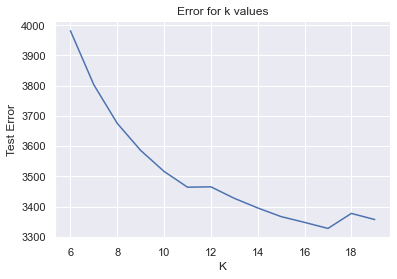

In [11]:
# Plotting the elbow curve for test error
plt.plot(k, test_error)
plt.xlabel("K")
plt.ylabel("Test Error")
plt.title("Error for k values")
plt.show()

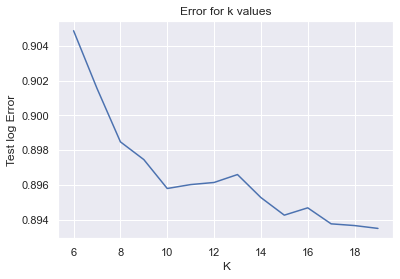

In [12]:
# Plotting the elbow curve for test log error
plt.plot(k, test_log_error)
plt.xlabel("K")
plt.ylabel("Test log Error")
plt.title("Error for k values")
plt.show()

    The best value of k is 17 

In [14]:
# Model with best k value
knn = KNN(n_neighbors=17)

# Fit the model
knn.fit(x_train, y_train)

# Predict results
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

knn_train_error = MSE(y_pred_train_knn, y_train, squared=False)
knn_test_error = MSE(y_pred_test_knn, y_test, squared=False)
knn_train_log_error = np.sqrt(MSLE(y_pred_train_knn, y_train))
knn_test_log_error = np.sqrt(MSLE(y_pred_test_knn, y_test))

print(f"Train error:\nRMSE: {knn_train_error}, RMSLE: {knn_train_log_error}\n\
Test error:\nRMSE: {knn_test_error}, RMSLE: {knn_test_log_error}")

Train error:
RMSE: 4021.423304122002, RMSLE: 0.8693437402604344
Test error:
RMSE: 3327.7816419814067, RMSLE: 0.893763601765688


# Linear Model  

In [15]:
# Importing linear regression
from sklearn.linear_model import LinearRegression as LR

# Fit the model
lr = LR(normalize=True)
lr.fit(x_train, y_train)

# Predict results
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

lr_train_error = MSE(y_pred_train, y_train, squared=False)
lr_test_error = MSE(y_pred_test, y_test, squared=False)
lr_train_log_error = np.sqrt(MSLE(y_pred_train, y_train))
lr_test_log_error = np.sqrt(MSLE(y_pred_test, y_test))

print(f"Train error:\nRMSE: {lr_train_error}, RMSLE: {lr_train_log_error}\n\
Test error:\nRMSE: {lr_test_error}, RMSLE: {lr_test_log_error}")

Train error:
RMSE: 4076.13353363044, RMSLE: 0.8867991874571813
Test error:
RMSE: 3137.3252056041156, RMSLE: 0.8874220907727645


In [16]:
lr.coef_

array([201.83107512, 130.03532865,  10.8344321 ,  68.19086959,
       -31.30479065,  24.70262763,  70.49843191])

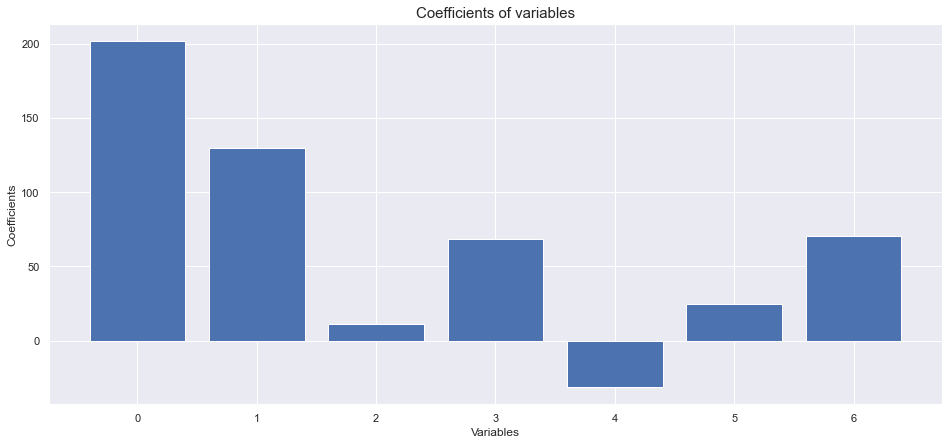

In [17]:
# Plotting the coefficients
plt.figure(figsize=(16, 7))
plt.bar(range(len(x_train.columns)), lr.coef_)
plt.xlabel("Variables", size=12)
plt.title("Coefficients of variables", size=15)
plt.ylabel("Coefficients", size=12)
plt.show()

# Regularization - Lasso 
 

In [18]:
# Using Lasso regression as there are less number of significant parameters
from sklearn.linear_model import Lasso
alpha = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_error, test_error, train_log_error, test_log_error = [], [], [], []
# Custom function to obtain error values
def lasso(alpha, x_train, y_train, x_test, y_test):
    LLR = Lasso(alpha=alpha, normalize=True)
    # Fit the model
    LLR.fit(x_train, y_train)
    y_pred_train = LLR.predict(x_train)
    y_pred_test = LLR.predict(x_test)
    # Get errors
    train_error.append(MSE(y_pred_train, y_train, squared=False))
    test_error.append(MSE(y_pred_test, y_test, squared=False))
    train_log_error.append(np.sqrt(MSLE(y_pred_train, y_train)))
    test_log_error.append(np.sqrt(MSLE(y_pred_test, y_test)))

for i in alpha:
    lasso(i, x_train, y_train, x_test, y_test)

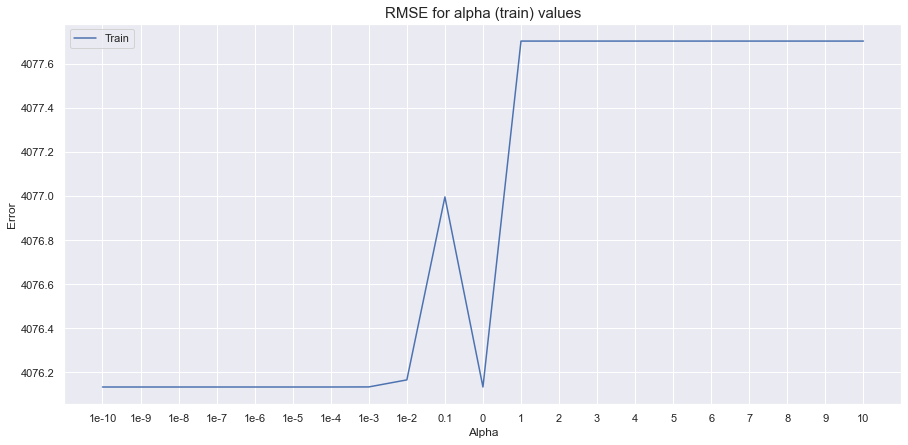

In [19]:
# Plotting the errors
alpha_val = ["1e-10", "1e-9", "1e-8", "1e-7", "1e-6", "1e-5", "1e-4", "1e-3", "1e-2", "0.1",
             "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
plt.figure(figsize=(15, 7))
sns.lineplot(alpha_val, train_error)
plt.title("RMSE for alpha (train) values", size=15)
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend(["Train"])
plt.show()

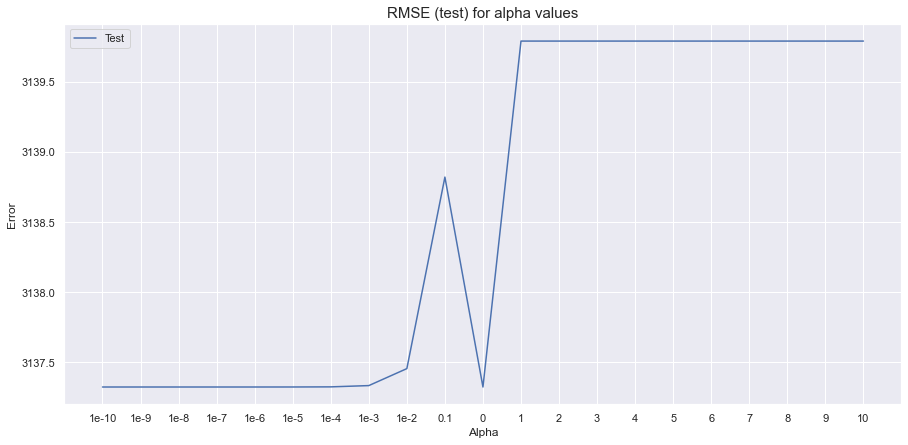

In [20]:
plt.figure(figsize=(15, 7))
sns.lineplot(alpha_val, test_error)
plt.title("RMSE (test) for alpha values", size=15)
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend(["Test"])
plt.show()

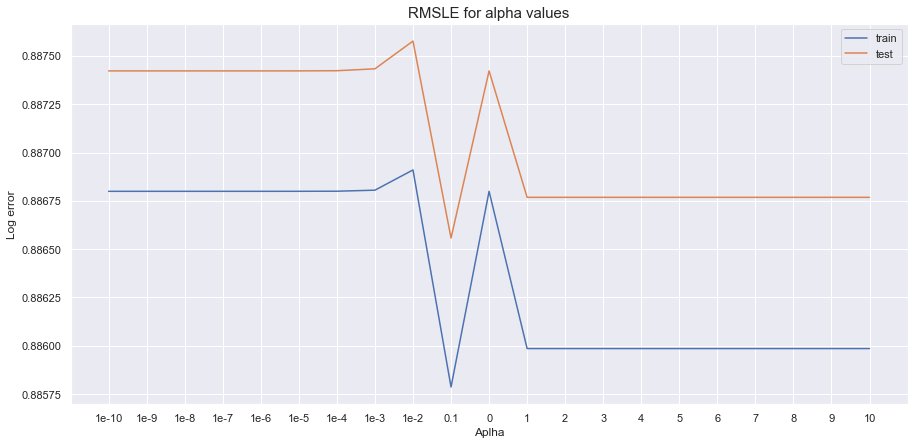

In [21]:
plt.figure(figsize=(15, 7))
plt.plot(alpha_val, train_log_error)
plt.plot(alpha_val, test_log_error)
plt.legend(["train", "test"])
plt.ylabel("Log error")
plt.title("RMSLE for alpha values", size=15)
plt.xlabel("Aplha")
plt.show()

In [22]:
# Lasso Regression model when alpha is 0.1
LLR = Lasso(alpha=0.1, normalize=True)
# Fit the model
LLR.fit(x_train, y_train)

# Predict results
y_pred_train_llr = LLR.predict(x_train)
y_pred_test_llr = LLR.predict(x_test)

llr_train_error = MSE(y_pred_train_llr, y_train, squared=False)
llr_test_error = MSE(y_pred_test_llr, y_test, squared=False)
llr_train_log_error = np.sqrt(MSLE(y_pred_train_llr, y_train))
llr_test_log_error = np.sqrt(MSLE(y_pred_test_llr, y_test))

print(f"Train error:\nRMSE: {llr_train_error}, RMSLE: {llr_train_log_error}\n\
Test error:\nRMSE: {llr_test_error}, RMSLE: {llr_test_log_error}")

Train error:
RMSE: 4076.9961765625135, RMSLE: 0.8857868437970989
Test error:
RMSE: 3138.821263527927, RMSLE: 0.8865575520756384


# Random Forest Model 

In [23]:
# Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor

# Fit the model
RFR = RandomForestRegressor(n_jobs=-1, random_state=108)
RFR.fit(x_train, y_train)

# Predict results
y_pred_train_rfr = RFR.predict(x_train)
y_pred_test_rfr = RFR.predict(x_test)

rfr_train_error = MSE(y_pred_train_rfr, y_train, squared=False)
rfr_test_error = MSE(y_pred_test_rfr, y_test, squared=False)
rfr_train_log_error = np.sqrt(MSLE(y_pred_train_rfr, y_train))
rfr_test_log_error = np.sqrt(MSLE(y_pred_test_rfr, y_test))

print(f"Train error:\nRMSE: {rfr_train_error}, RMSLE: {rfr_train_log_error}\n\
Test error:\nRMSE: {rfr_test_error}, RMSLE: {rfr_test_log_error}")

Train error:
RMSE: 3914.773069884043, RMSLE: 0.8470906486023579
Test error:
RMSE: 3354.4088772242776, RMSLE: 0.8969655775430107


In [24]:
# Importance of each feature
pd.Series(RFR.feature_importances_, index=x_train.columns)

vendor_id          0.005777
passenger_count    0.255674
day_of_month       0.240738
week_of_month      0.080025
week_of_day        0.147024
hour_of_day        0.242602
month_of_year      0.028159
dtype: float64

### Tuning Hyperparameters using Random Search

In [25]:
# Defining parameters for Random Search
parameters = {
    "n_estimators": [100, 200],
    "max_depth": [5, 8, 9, 10, 11, 12, 13, 14, 15],
    "min_samples_leaf": [35, 40, 45, 50],
    "min_samples_split": [15, 20, 25, 30, 25, 40, 45, 50],
    "max_leaf_nodes": [25, 30, 35, 40, 45, 50]
}

In [26]:
# Importing Random Search
from sklearn.model_selection import RandomizedSearchCV

random_search_params = RandomizedSearchCV(estimator=RFR, param_distributions=parameters, n_iter=10, random_state=108, cv=3,
                                         scoring="neg_mean_squared_error", n_jobs=-1)

In [27]:
random_search_params.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=108),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 9, 10, 11, 12, 13,
                                                      14, 15],
                                        'max_leaf_nodes': [25, 30, 35, 40, 45,
                                                           50],
                                        'min_samples_leaf': [35, 40, 45, 50],
                                        'min_samples_split': [15, 20, 25, 30,
                                                              25, 40, 45, 50],
                                        'n_estimators': [100, 200]},
                   random_state=108, scoring='neg_mean_squared_error')

In [28]:
random_search_params.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 50,
 'max_leaf_nodes': 35,
 'max_depth': 10}

In [29]:
# Building Random Forest model with best parameters

# Fit the model
RFR = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=20, min_samples_leaf=50,
                            max_leaf_nodes=35, random_state=108)
RFR.fit(x_train, y_train)

# Predict results
y_pred_train_rfr = RFR.predict(x_train)
y_pred_test_rfr = RFR.predict(x_test)

rfr_train_error = MSE(y_pred_train_rfr, y_train, squared=False)
rfr_test_error = MSE(y_pred_test_rfr, y_test, squared=False)
rfr_train_log_error = np.sqrt(MSLE(y_pred_train_rfr, y_train))
rfr_test_log_error = np.sqrt(MSLE(y_pred_test_rfr, y_test))

print(f"Train error:\nRMSE: {rfr_train_error}, RMSLE: {rfr_train_log_error}\n\
Test error:\nRMSE: {rfr_test_error}, RMSLE: {rfr_test_log_error}")

Train error:
RMSE: 4063.301415724563, RMSLE: 0.8799871686945085
Test error:
RMSE: 3143.4398972640565, RMSLE: 0.8810444224683587


# Gradient Boosting Model 

In [30]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit the model
GBR = GradientBoostingRegressor(n_estimators=100, random_state=108)
GBR.fit(x_train, y_train)

# Predict results
y_pred_train_gbr = GBR.predict(x_train)
y_pred_test_gbr = GBR.predict(x_test)

gbr_train_error = MSE(y_pred_train_gbr, y_train, squared=False)
gbr_test_error = MSE(y_pred_test_gbr, y_test, squared=False)
gbr_train_log_error = np.sqrt(MSLE(y_pred_train_gbr, y_train))
gbr_test_log_error = np.sqrt(MSLE(y_pred_test_gbr, y_test))

print(f"Train error:\nRMSE: {gbr_train_error}, RMSLE: {gbr_train_log_error}\n\
Test error:\nRMSE: {gbr_test_error}, RMSLE: {gbr_test_log_error}")

Train error:
RMSE: 4067.378904463719, RMSLE: 0.8785298945061432
Test error:
RMSE: 3137.423456545719, RMSLE: 0.8790276683082929


In [31]:
# Importance of each feature
pd.Series(GBR.feature_importances_, index=x_train.columns)

vendor_id          0.134387
passenger_count    0.016308
day_of_month       0.338385
week_of_month      0.132808
week_of_day        0.045636
hour_of_day        0.322019
month_of_year      0.010456
dtype: float64

# Averaging 

In [32]:
# Importing mean
from statistics import mean

# Appending mean (average) into a numpy array
pred = np.array([])
for i in range(0, len(x_test)):
    pred = np.append(pred, mean([y_pred_test_knn[i], y_pred_test_llr[i], y_pred_test_rfr[i], y_pred_test_gbr[i]]))

In [33]:
# Original error
print(f"Error for KNN: {knn_test_error}\nError for Lasso Regression: {llr_test_error}\nError for Random Forest: \
{rfr_test_error}\nError for Gradient Boosting: {gbr_test_error}\n")

# Averaged error
print(f"Averaged Error: {MSE(pred, y_test, squared=False)}")

Error for KNN: 3327.7816419814067
Error for Lasso Regression: 3138.821263527927
Error for Random Forest: 3143.4398972640565
Error for Gradient Boosting: 3137.423456545719

Averaged Error: 3152.601832555099


# Weighted Averaging 

In [34]:
# Appending mean into a numpy array (weight 1 to knn, 2 to lasso regression and random forest and 3 to gradient bossting)
pred = np.array([])
for i in range(0, len(x_test)):
    pred = np.append(pred, mean([y_pred_test_knn[i], y_pred_test_llr[i], y_pred_test_llr[i], y_pred_test_rfr[i],
                                 y_pred_test_rfr[i], y_pred_test_gbr[i], y_pred_test_gbr[i], y_pred_test_gbr[i]]))

In [35]:
# Original error
print(f"Error for KNN: {knn_test_error}\nError for Lasso Regression: {llr_test_error}\nError for Random Forest: \
{rfr_test_error}\nError for Gradient Boosting: {gbr_test_error}\n")

# Averaged error
print(f"Averaged Error: {MSE(pred, y_test, squared=False)}")

Error for KNN: 3327.7816419814067
Error for Lasso Regression: 3138.821263527927
Error for Random Forest: 3143.4398972640565
Error for Gradient Boosting: 3137.423456545719

Averaged Error: 3142.2472080668786


# Rank Averaging 

In [36]:
# Creating dataframe with ranks for error values of models
index = [1, 2, 3, 4]
errors = [knn_test_error, llr_test_error, rfr_test_error, gbr_test_error]
df = pd.DataFrame({"Error": errors}, index=index)

# Sorting values, assigning ranks and calculating weights
df.sort_values("Error")
df["Rank"] = range(1, 5)
df['Weight'] = df['Rank'] / df['Rank'].sum()
df

,Error,Rank,Weight
1,3327.781642,1,0.1
2,3138.821264,2,0.2
3,3143.439897,3,0.3
4,3137.423457,4,0.4


In [37]:
# Calculating values
knn = y_pred_test_knn * float(df.loc[[1],['Weight']].values)
llr = y_pred_test_llr * float(df.loc[[2],['Weight']].values)
rfr = y_pred_test_rfr * float(df.loc[[3],['Weight']].values)
gbr = y_pred_test_gbr * float(df.loc[[4],['Weight']].values)

# Averaging
pred = knn + llr + rfr + gbr
print(f"Averaged Error: {MSE(pred, y_test, squared=False)}")

Averaged Error: 3141.281247516399


    Hence, rank averaging performs the best all the above models and techniques with error of 3141